<a href="https://colab.research.google.com/github/KemmarinVee/Python_Technical/blob/main/Image_procressing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
file_path = glob.glob("/content/drive/MyDrive/Touch_Technologies/2023/ฉลากโภชนการGDA/Clear_img/*")
print(file_path)

['/content/drive/MyDrive/Touch_Technologies/2023/ฉลากโภชนการGDA/Clear_img/img1.png', '/content/drive/MyDrive/Touch_Technologies/2023/ฉลากโภชนการGDA/Clear_img/img3.png', '/content/drive/MyDrive/Touch_Technologies/2023/ฉลากโภชนการGDA/Clear_img/img2.png', '/content/drive/MyDrive/Touch_Technologies/2023/ฉลากโภชนการGDA/Clear_img/img0.png', '/content/drive/MyDrive/Touch_Technologies/2023/ฉลากโภชนการGDA/Clear_img/img4.png']


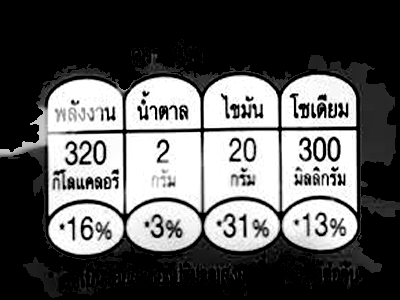

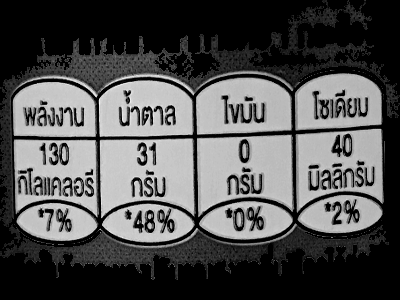

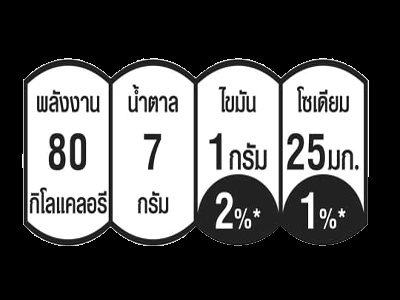

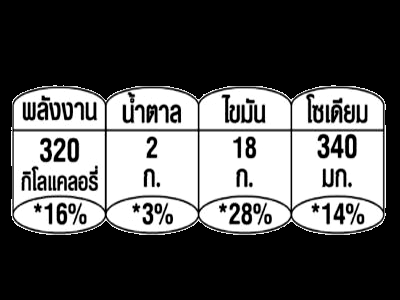

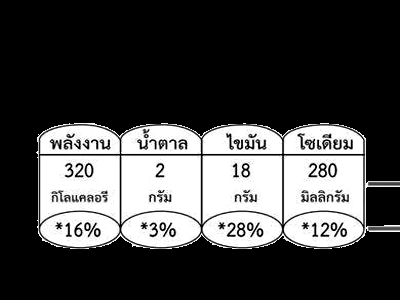

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

for f in file_path:
  im = cv2.imread(f)
  cv2_imshow(im)

(177, 61) (178, 252) (0, 158) (356, 155)
0.5491785096364195 1.02362205


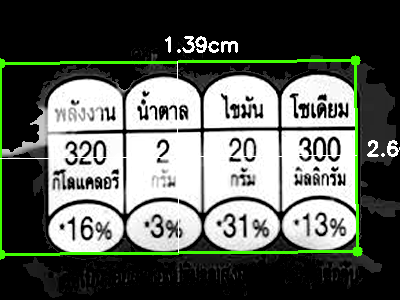

(194, 70) (198, 247) (10, 162) (382, 154)
0.4870577143901524 1.02362205


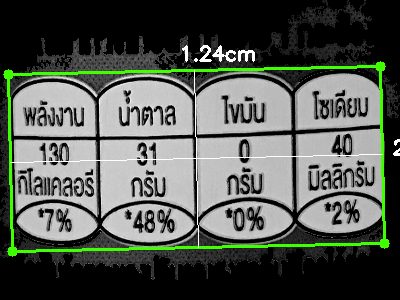

(195, 57) (195, 246) (21, 151) (369, 151)
0.5559326650862069 1.02362205


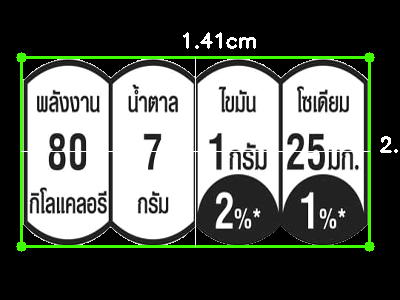

(198, 84) (198, 235) (10, 159) (386, 159)
0.41108225944148935 1.02362205


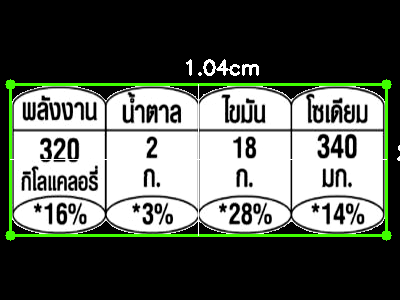

(217, 122) (217, 248) (36, 185) (399, 185)
0.3553068272727273 1.02362205


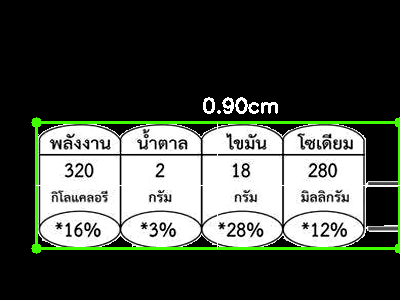

In [ ]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

def img(path):
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # #Convert a grayscale image to black and white using binary thresholding
  # (thresh, BnW_image) = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)

  # #display all the images
  # cv2_imshow(BnW_image)

  gray = cv2.GaussianBlur(gray, (7, 7), 0)

  edged = cv2.Canny(gray, 50, 100)
  edged = cv2.dilate(edged, None, iterations=1)
  edged = cv2.erode(edged, None, iterations=1)

  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)

  (cnts, _) = contours.sort_contours(cnts)
  pixelsPerMetric = None

  for c in cnts:
    if cv2.contourArea(c) < 700:
      continue

    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 64), 2)

    for (x, y) in box:
      cv2.circle(orig, (int(x), int(y)), 5, (0, 255, 64), -1)

    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)

    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    cv2.circle(orig, (int(tltrX), int(tltrY)), 0, (0, 255, 64), 0)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 0, (0, 255, 64), 0)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 0, (0, 255, 64), 0)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 0, (0, 255, 64), 0)

    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
      (255, 255, 255), 1)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
      (255, 255, 255), 1)

    print((int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)))

    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    if pixelsPerMetric is None:
      pixelsPerMetric = dB / 1.02362205

    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric
    print(dimA,dimB)

    cv2.putText(orig, "{:.2f}cm".format(dimA * 2.54),
      (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
      0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.2f}cm".format(dimB * 2.54),
      (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
      0.65, (255, 255, 255), 2)

    # show output
    cv2_imshow(orig)
    cv2.waitKey(0)


for f in file_path:
  img(f)

In [ ]:
import cv2
img = cv2.imread(file_path[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 0
high_threshold = 255
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 10  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

# Draw the lines on the  image
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)


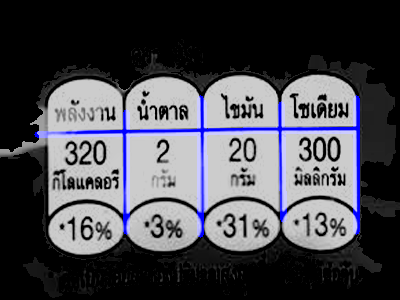

In [ ]:
cv2_imshow(lines_edges)